# {Project Title}📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->

## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

In [69]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error



In [54]:

df = pd.read_csv("dataset/steam_games.csv")
df1 = pd.read_csv("dataset/steam.csv")
df2 = pd.read_csv('dataset/games.csv')
replace_dict = {'Free': 0.00, 'Free To Play': 0.00}
df['original_price'] = df['original_price'].replace(replace_dict, regex=False)
df['original_price'] = df['original_price'].str.replace('$', '', regex=False)
specific_value = 0
mask = (df['original_price'] == specific_value)
new_df = df.loc[~mask]
new_df['original_price'] = new_df['original_price'].replace(replace_dict)
new_df['original_price'] = new_df['original_price'].str.replace('$', '', regex=False)
new_df['all_reviews'] = new_df['all_reviews'].str.split(',', n=1).str[0]
new_df.head()

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...",Very Positive,"May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...",Mixed,"Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...",Mostly Positive,"Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...",Mixed,"Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...",Mostly Positive,"May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",NaN,NaN


In [11]:

df['popular_tags'] = df['popular_tags'].astype('str')
df['game_details'] = df['game_details'].astype('str')
df['genre'] = df['genre'].astype('str')




In [12]:

tag_counter = new_df['popular_tags'].str.count(',') + 1
new_df['tag_counter'] = tag_counter
new_df['tag_counter'] = new_df['tag_counter'].astype('float')


In [14]:
#find unique tags
all_words = []

for text in df['genre']:
    words = text.split()
    all_words.extend(words)
unique_words = set(all_words)
#print(unique_words)
print(all_words)


['Action', 'Action,Adventure,Massively', 'Multiplayer', 'Action,Adventure,Strategy', 'Action,Adventure,Massively', 'Multiplayer', 'Action,Free', 'to', 'Play,Massively', 'Multiplayer,RPG,Strategy', 'Action,Adventure', 'Action', 'Adventure,Indie', 'Strategy,Early', 'Access', 'Action,Adventure,RPG', 'Adventure,Indie,RPG,Strategy', 'Adventure', 'Action,Adventure,Free', 'to', 'Play,Massively', 'Multiplayer,RPG', 'Action', 'Indie,Simulation,Strategy', 'Simulation,Strategy', 'Action,Indie,Early', 'Access', 'Action', 'Action,Free', 'to', 'Play', 'Strategy', 'Action', 'Adventure', 'Racing', 'Action,RPG', 'Action,Adventure', 'Action,Adventure', 'Action', 'Indie,Simulation', 'RPG', 'Adventure,RPG', 'Free', 'to', 'Play,Massively', 'Multiplayer,RPG', 'Action,Adventure,Indie', 'Adventure', 'Action,Adventure,RPG', 'Indie,Simulation,Strategy', 'Action', 'Free', 'to', 'Play,Massively', 'Multiplayer,RPG', 'Adventure', 'Action,RPG', 'Action', 'Strategy', 'Adventure,RPG,Simulation', 'Action', 'Action', 'A

In [64]:
num_tags = new_df['popular_tags'].str.count(',') + 1
new_df['tag_counter'] = num_tags
new_df['tag_counter'] = new_df['tag_counter'].astype('float')
df2['Release date'] = df2['Release date'].apply(lambda x: x.split(', ')[-1])
df2.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,2008,0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,2017,0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,2021,0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,2020,0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,2020,0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


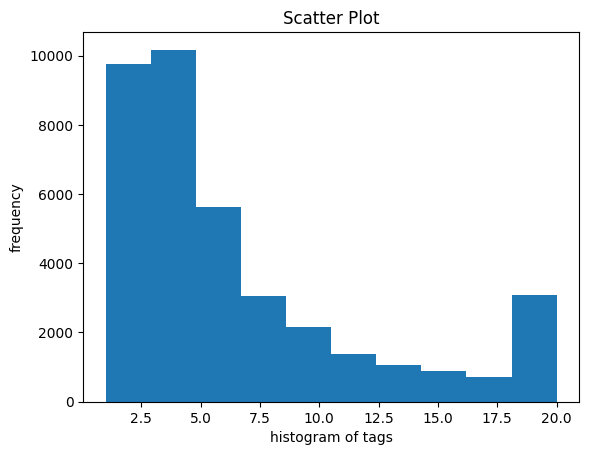

In [16]:

plt.hist(new_df['tag_counter'])
plt.title('Scatter Plot')
plt.xlabel('histogram of tags')
plt.ylabel('frequency')
plt.show()

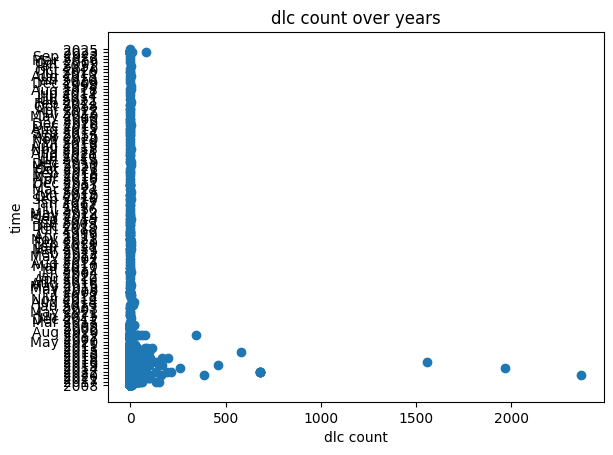

In [61]:
plt.scatter(df2['DLC count'],df2['Release date'])
plt.title('dlc count over years')
plt.xlabel('dlc count')
plt.ylabel('time')
plt.show()

In [ ]:
plt.scatter(new_df['achievements'],new_df['tag_counter'])
plt.title('Scatter Plot')
plt.xlabel('number of achievments')
plt.ylabel('frequency')
plt.show()

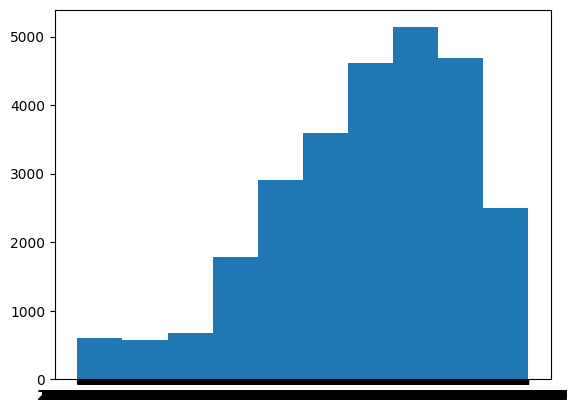

In [ ]:
plt.hist(df1['release_date'])
plt.show()

In [ ]:
wordcount = df2['About the game'].str.count(' ') + 1
df2['words'] = wordcount
df2['words'] = df2['words'].astype('float')

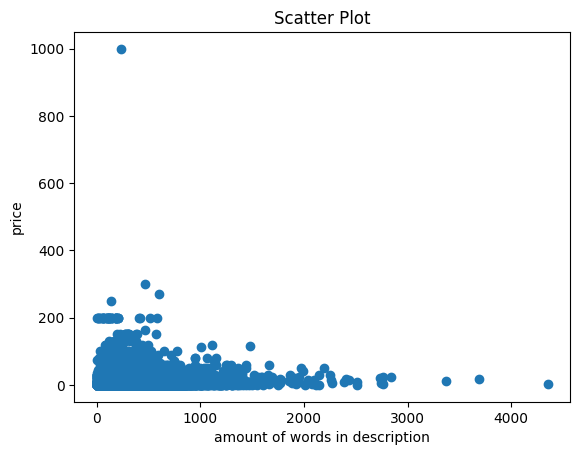

In [ ]:
plt.scatter(df2['words'],df2['Price'])
plt.title('Scatter Plot')
plt.xlabel('amount of words in description')
plt.ylabel('price')
plt.show()

In [34]:
corr_matrix = df2.corr()['Price'].sort_values(ascending=False)
print(corr_matrix)


Price                         1.000000
Score rank                    0.288778
Metacritic score              0.172542
Required age                  0.109520
Average playtime forever      0.075409
Average playtime two weeks    0.070798
Median playtime two weeks     0.069616
Recommendations               0.050899
DLC count                     0.050723
Median playtime forever       0.048492
Peak CCU                      0.037259
Positive                      0.034869
Negative                      0.028413
Mac                           0.023774
Linux                         0.012000
Achievements                  0.005817
User score                   -0.000207
Windows                      -0.024142
AppID                        -0.085350
Name: Price, dtype: float64


C:\Users\husem\AppData\Local\Temp\ipykernel_15252\3625410054.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df2.corr()['Price'].sort_values(ascending=False)


In [97]:
nonandf2 = df2.fillna(0)
X = nonandf2[['Positive', 'Negative','DLC count','Score rank','Metacritic score']]
y = nonandf2['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
accuracy = lr.score(X_test, y_test)
print(accuracy)


0.038824810845876745


In [96]:
nonandf2.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,2008,0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,2017,0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,2021,0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",0,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,2020,0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,2020,0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->

In [ ]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 1271 bytes to source.py
